In [1]:
import pandas as pd
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")
train_df.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [2]:
download_dic={"10+":0, "50+":1,"100+":2, "500+":3,"1,000+":4,"5,000+":5, "10,000+":6, "50,000+":7,"100,000+":8,"500,000+":9,
     "1,000,000+":10,"5,000,000+":11,"10,000,000+":12,"50,000,000+":13,"100,000,000+":14,"500,000,000+":15,"1,000,000,000+":16,
    "5,000,000,000+":17}

train_df.Downloads=train_df.Downloads.map(download_dic)
train_df.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,8
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,5
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,6
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,12
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,5


In [3]:
def fixing_size(data):
    
    if data=="Varies with device":
        data="0"
    
    elif "M" in data:
        data=data[:-1]
    
    else:
        data="1"
        
    return data
train_df["Size"]=train_df["Size"].apply(fixing_size) 
train_df["Size"]=train_df["Size"].astype("float")
train_df["Size"]=train_df["Size"].apply(lambda x: round(x))

train_df["Price"]=train_df["Price"].apply(lambda x: "Charged" if x!="Free" else x)

rating_dic={"Everyone":"Everyone", "Teen":"Teen","Everyone 10+":"Others", "Mature 17+":"Everyone",
            "Adults only 18+":"Everyone" ,"Unrated":"Everyone"}
train_df.Content_Rating=train_df.Content_Rating.map(rating_dic)

import datetime
train_df.Last_Updated_On=pd.to_datetime(train_df.Last_Updated_On)
train_df.Last_Updated_On=pd.datetime.now().date()-train_df.Last_Updated_On.dt.date
train_df.Last_Updated_On=train_df.Last_Updated_On.astype("str")
train_df.Last_Updated_On=train_df.Last_Updated_On.apply(lambda x: x[:3])
train_df.Last_Updated_On=train_df.Last_Updated_On.str.strip()
train_df.Last_Updated_On=train_df.Last_Updated_On.astype("int")

train_df.Release_Version=train_df.Release_Version.replace("Varies with device","0")
train_df.Release_Version=train_df.Release_Version.apply(lambda x: x[0])
train_df.Release_Version=train_df.Release_Version.apply(lambda x: x if x.isdigit() else "0")
train_df.Release_Version=train_df.Release_Version.astype("int")

train_df.OS_Version_Required=train_df.OS_Version_Required.replace("Varies with device","0")
train_df.OS_Version_Required=train_df.OS_Version_Required.apply(lambda x: x[0])
train_df.OS_Version_Required=train_df.OS_Version_Required.astype("int")

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           24776 non-null  object 
 1   Category             24776 non-null  object 
 2   Rating               24776 non-null  float64
 3   Reviews              24776 non-null  int64  
 4   Size                 24776 non-null  object 
 5   Price                24776 non-null  object 
 6   Content_Rating       24776 non-null  object 
 7   Last_Updated_On      24776 non-null  object 
 8   Release_Version      24776 non-null  object 
 9   OS_Version_Required  24776 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB


In [5]:
test_df["Size"]=test_df["Size"].apply(fixing_size) 
test_df["Size"]=test_df["Size"].astype("float")
test_df["Size"]=test_df["Size"].apply(lambda x: round(x))

test_df["Price"]=test_df["Price"].apply(lambda x: "Charged" if x!="Free" else x)


rating_dic={"Everyone":"Everyone", "Teen":"Teen","Everyone 10+":"Others", "Mature 17+":"Everyone",
            "Adults only 18+":"Everyone" ,"Unrated":"Everyone"}
test_df.Content_Rating=test_df.Content_Rating.map(rating_dic)

import datetime
test_df.Last_Updated_On=pd.to_datetime(test_df.Last_Updated_On)
test_df.Last_Updated_On=pd.datetime.now().date()-test_df.Last_Updated_On.dt.date
test_df.Last_Updated_On=test_df.Last_Updated_On.astype("str")
test_df.Last_Updated_On=test_df.Last_Updated_On.apply(lambda x: x[:3])
test_df.Last_Updated_On=test_df.Last_Updated_On.str.strip()
test_df.Last_Updated_On=test_df.Last_Updated_On.astype("int")

test_df.Release_Version=test_df.Release_Version.replace("Varies with device","0")
test_df.Release_Version=test_df.Release_Version.apply(lambda x: x[0])
test_df.Release_Version=test_df.Release_Version.apply(lambda x: x if x.isdigit() else "0")
test_df.Release_Version=test_df.Release_Version.astype("int")

test_df.OS_Version_Required=test_df.OS_Version_Required.replace("Varies with device","0")
test_df.OS_Version_Required=test_df.OS_Version_Required.apply(lambda x: x[0])
test_df.OS_Version_Required=test_df.OS_Version_Required.astype("int")

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [6]:
train_df.drop("Category", axis=1, inplace=True)
test_df.drop("Category", axis=1, inplace=True)

In [7]:
test=test_df.copy()
test.drop("Offered_By", axis=1,inplace=True)
test=pd.get_dummies(test)
test.shape

(24776, 11)

In [8]:
y=train_df.Downloads
train_df.drop("Downloads", axis=1,inplace=True)
train_df.head()

,Offered_By,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,ps_id-24654,4.18,1481,0,Free,Everyone,110,0,0
1,ps_id-35329,4.81,302,10,Free,Everyone,150,3,4
2,ps_id-11044,4.27,374,27,Free,Everyone,114,1,4
3,ps_id-36068,4.03,122058,0,Free,Teen,113,0,0
4,ps_id-35831,4.60,358,0,Charged,Everyone,633,0,0


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16516 entries, 0 to 16515
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16516 non-null  object 
 1   Rating               16516 non-null  float64
 2   Reviews              16516 non-null  int64  
 3   Size                 16516 non-null  int64  
 4   Price                16516 non-null  object 
 5   Content_Rating       16516 non-null  object 
 6   Last_Updated_On      16516 non-null  int32  
 7   Release_Version      16516 non-null  int32  
 8   OS_Version_Required  16516 non-null  int32  
dtypes: float64(1), int32(3), int64(2), object(3)
memory usage: 967.9+ KB


In [10]:
train=train_df.copy()
train.drop("Offered_By",axis=1, inplace=True)
train

,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,4.18,1481,0,Free,Everyone,110,0,0
1,4.81,302,10,Free,Everyone,150,3,4
2,4.27,374,27,Free,Everyone,114,1,4
3,4.03,122058,0,Free,Teen,113,0,0
4,4.60,358,0,Charged,Everyone,633,0,0
...,...,...,...,...,...,...,...,...
16511,4.30,13724,0,Free,Everyone,702,0,0
16512,4.73,70,8,Free,Everyone,108,0,4
16513,4.60,5420,21,Free,Everyone,410,2,4
16514,4.60,1488289,0,Free,Everyone,351,0,0


In [11]:
train=pd.get_dummies(train)
train.shape

(16516, 11)

In [15]:
test.shape

(24776, 11)

In [13]:
train=pd.concat([train,y], axis=1)

In [16]:
train[(train.Size>10) & (train.Size<100)]

,Rating,Reviews,Size,Last_Updated_On,Release_Version,OS_Version_Required,Price_Charged,Price_Free,Content_Rating_Everyone,Content_Rating_Others,Content_Rating_Teen,Downloads
2,4.27,374,27,114,1,4,0,1,1,0,0,6
6,4.60,1992,24,395,3,5,0,1,1,0,0,7
7,4.62,37975,20,110,1,4,0,1,1,0,0,10
9,4.10,349503,19,142,1,4,0,1,1,0,0,12
11,4.30,6333,30,421,1,5,0,1,1,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
16506,4.15,4016,95,124,1,2,0,1,0,1,0,8
16507,4.60,1226514,99,365,4,4,0,1,0,0,1,12
16508,4.43,17054,74,109,7,4,0,1,0,1,0,9
16513,4.60,5420,21,410,2,4,0,1,1,0,0,9


In [17]:
train.corr()

,Rating,Reviews,Size,Last_Updated_On,Release_Version,OS_Version_Required,Price_Charged,Price_Free,Content_Rating_Everyone,Content_Rating_Others,Content_Rating_Teen,Downloads
Rating,1.000000,0.030852,0.016771,-0.052672,-0.025991,-0.006731,0.049166,-0.049166,-0.022629,0.009493,0.019995,0.050419
Reviews,0.030852,1.000000,0.025094,0.000542,-0.023155,-0.106879,-0.024729,0.024729,-0.077135,0.031598,0.068640,0.210731
Size,0.016771,0.025094,1.000000,-0.030744,0.106904,0.262093,0.019679,-0.019679,-0.166042,0.141602,0.101228,0.127157
Last_Updated_On,-0.052672,0.000542,-0.030744,1.000000,-0.071224,-0.084654,0.045763,-0.045763,-0.010997,0.003800,0.010232,-0.079023
Release_Version,-0.025991,-0.023155,0.106904,-0.071224,1.000000,0.306225,-0.050459,0.050459,0.033509,-0.028404,-0.020538,0.059072
OS_Version_Required,-0.006731,-0.106879,0.262093,-0.084654,0.306225,1.000000,-0.080304,0.080304,0.036876,-0.014246,-0.033359,-0.207998
Price_Charged,0.049166,-0.024729,0.019679,0.045763,-0.050459,-0.080304,1.000000,-1.000000,-0.023201,0.049587,-0.004698,-0.231717
Price_Free,-0.049166,0.024729,-0.019679,-0.045763,0.050459,0.080304,-1.000000,1.000000,0.023201,-0.049587,0.004698,0.231717
Content_Rating_Everyone,-0.022629,-0.077135,-0.166042,-0.010997,0.033509,0.036876,-0.023201,0.023201,1.000000,-0.495393,-0.835651,-0.144999
Content_Rating_Others,0.009493,0.031598,0.141602,0.003800,-0.028404,-0.014246,0.049587,-0.049587,-0.495393,1.000000,-0.063151,0.087116


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
features=["Rating","Reviews"]
poly_feat=poly.fit_transform(train[features])
poly_feat_test=poly.transform(test[features])

In [14]:
train_poly=pd.DataFrame(poly_feat, columns=poly.get_feature_names(input_features=features))
test_poly=pd.DataFrame(poly_feat_test, columns=poly.get_feature_names(input_features=features))
train_poly.drop("1", axis=1, inplace=True)
test_poly.drop("1", axis=1, inplace=True)

In [15]:
train.drop(features, axis=1, inplace=True)
test.drop(features, axis=1, inplace=True)

In [16]:
train=train.join(train_poly,)
test=test.join(test_poly)

In [17]:
test.shape

(24776, 18)

In [18]:
train.shape

(16516, 18)

In [19]:
y.shape

(16516,)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

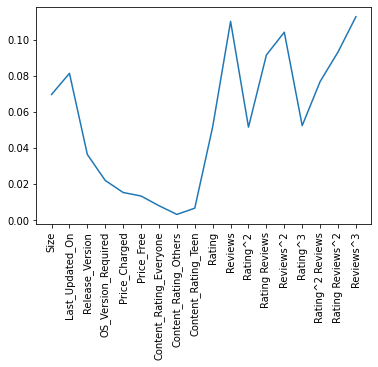

In [31]:
import numpy as np
plt.figure(figsize=(10,8));
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(train.shape[1]), train.columns.tolist(),rotation=90);

In [198]:
xgb=XGBClassifier(learning_rate=0.01,)
xgb.fit(train,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [199]:
pd.DataFrame(xgb.feature_importances_, index=train.columns).sort_values(0, ascending=False)

,0
Reviews,0.444734
Rating Reviews^2,0.207956
Rating Reviews,0.127848
Price_Charged,0.078353
Content_Rating_Teen,0.027076
Rating,0.024934
OS_Version_Required,0.016906
Release_Version,0.015629
Content_Rating_Everyone,0.015310
Rating^2 Reviews,0.015118


In [171]:
train.drop(["Price_Free","Rating^2","Reviews^2"], axis=1,inplace=True)
test.drop(["Price_Free","Rating^2","Reviews^2"], axis=1, inplace=True)

In [212]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
xgb.fit(train,y)

In [208]:
pd.DataFrame(xgb.feature_importances_, index=train.columns).sort_values(0, ascending=False)

,0
Reviews,0.415903
Rating Reviews^2,0.151803
Price_Charged,0.134847
Rating Reviews,0.062964
Rating,0.041921
Content_Rating_Everyone,0.034264
Rating^2 Reviews,0.032314
Content_Rating_Teen,0.023017
Content_Rating_Others,0.021311
Size,0.021215


In [200]:
pred=xgb.predict_proba(test)

In [228]:
pred

array([[0.05555556, 0.05555556, 0.05555556, ..., 0.05555556, 0.05555556,
        0.05555556],
       [0.05555555, 0.05555555, 0.05555555, ..., 0.05555557, 0.05555557,
        0.05555557],
       [0.05471882, 0.05471882, 0.05471882, ..., 0.05705305, 0.05705304,
        0.05705307],
       ...,
       [0.05555556, 0.05555556, 0.05555556, ..., 0.05555556, 0.05555556,
        0.05555556],
       [0.04839112, 0.04839112, 0.04839112, ..., 0.06852019, 0.06852018,
        0.06852031],
       [0.05555555, 0.05555555, 0.05555555, ..., 0.05555556, 0.05555556,
        0.05555556]])

In [229]:
import numpy as np
submission=pd.DataFrame(pred)
submission

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556
1,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556
2,0.054719,0.054719,0.054719,0.054719,0.054719,0.054719,0.054719,0.054719,0.054719,0.054721,0.054795,0.055747,0.057004,0.057051,0.057053,0.057053,0.057053,0.057053
3,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556
4,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24771,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556
24772,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556
24773,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556
24774,0.048391,0.048391,0.048391,0.048391,0.048391,0.048391,0.048391,0.048391,0.048392,0.048409,0.048957,0.056505,0.068027,0.068500,0.068520,0.068520,0.068520,0.068520


In [230]:
sub=submission.to_csv("book.csv", index=False)

In [227]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)

lr.fit(train,y)
pred=lr.predict_proba(test)

C:\Users\Rahul\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [218]:
param_grid=[{"class_weight":["balanced","dict"],"solver":["saga","sag","newton-cg"],"multi_class":["multinomial"],
             "penalty":["l1","l2"]}]
grid_search=GridSearchCV(lr,param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(train,y)
grid_search.best_estimator_

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'dict'

  FitFailedWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'dict'

  FitFailedWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'dict'

  FitFailedWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\model_selection\_va

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [222]:
grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)